## 기울기 소실(Gradient Vanishing)과 폭주(Exploding)
- https://wikidocs.net/61375
- 기울기 소실:
    - 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생
    - 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됨
- 기울기 폭주
    - 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 발산
    - 순환 신경망 RNN에서 쉽게 발생 가능
- 기울기 소실 또는 폭주 방지 방법

### ReLU와 ReLU의 변형들
- 시그모이드 함수 사용시
    - 출력값이 0또는 1에 수렴하면서, 기울기가 0에 가까워짐 -> 기울기 소실 문제 발생 가능성 up
- 기울기 소실을 완화하는 가장 간단한 방법
    - 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것

### 그래디언트 클리핑(Gradient Clipping)
- 기울기 값을 자르는 것을 의미
    - 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자름
    - 즉, 임계치만큼 크기를 감소시킴
- RNN에서 유용
    - RNN은 역전파 과정에서 시점을 역행하면서 기울기를 구하는데, 이때 기울기가 너무 커질 수 있기 때문

In [1]:
# 케라스
from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)

C:\Users\JiyoonLee\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 가중치 초기화(Weight initialization)
- 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라짐
    - 지난번 머신러닝 때 케라스 버전에 따라 달랐던 경우
- 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화 가능

#### 세이비어 초기화(Xavier Initialization)
- 글로럿 초기화(Glorot Initialization)라고도 부름
- 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우 나뉨
- 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세움
- 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 방지
- 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능
- ReLU와 함께 사용할 경우에는 성능이 좋지 않음
    - ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우, HE초기화 적합

#### He 초기화
- 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 나뉨
- (세이비어 초기화와 다르게) 다음 층의 뉴런의 수를 반영X

### 배치 정규화(Batch Normalization)
- 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 진행

#### 내부 공변량 변화(Internal Covariate Shift)
- 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상
    - 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생
    - 배치 정규화를 제안한 논문 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장
    - 이에 대한 반박이 나오기도..
    - 배치 정규화가 학습을 돕는다는 것은 명백
- 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미
- 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미

#### 배치 정규화(Batch Normalization)
- 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것
- 각 층에서 활성화 함수를 통과하기 전에 수행
- 과정
    - 입력에 대해 평균을 0으로 만들고, 정규화 진행 
    - 정규화 된 데이터에 대해서 스케일과 시프트를 수행 (Standardization)
        - 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용하고, β는 시프트를 하는 것에 사용 <br>
        - mean을 빼는걸 shift, standard deviation 나누는걸 scaling <br>
        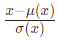 <br>
        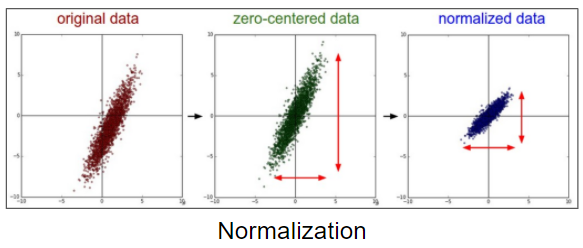 <br>
        - 출처: https://velog.io/@choiking10/Batch-Normalization%EC%97%90-%EB%8C%80%ED%95%B4%EC%84%9C-%EC%95%8C%EC%95%84%EB%B3%B4%EC%9E%90
    - 다음 레이어에 일정한 범위의 값들만 전달됨
- 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제 크게 개선됨
- 가중치 초기화에 훨씬 덜 민감해짐
- 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선 가능
- 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 잡음 주입의 부수 효과로 과적합을 방지하는 효과 (드롭아웃과 비슷한 효과)
- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간 느려짐
    - 서비스 속도를 고려한다면, 꼭 필요한지 고민 필요    

#### 배치 정규화의 한계
- 1. 미니 배치 크기에 의존적
    - 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있음
        - 배치크기를 1로 하게 되면 분산은 0이됨
        - 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향
        - 어느정도 되는 미니 배치에서 하는 것이 좋음
- 2. RNN에 적용하기 어려움
    - RNN은 각 시점(time step)마다 다른 통계치 가짐
    - 이 특징으로 인해 배치 정규화를 RNN에 적용하는 것이 어려워진다고 함

### 층 정규화(Layer Normalization)
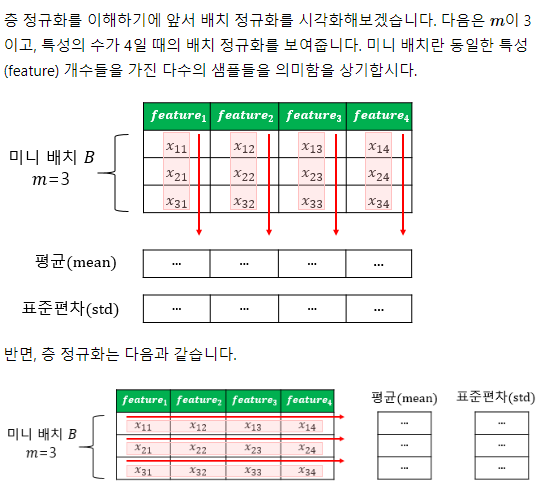